In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

# Анализ с двумя переменными

После изучения каждой переменной по отдельности, мы переходим к анализу их **взаимосвязи между собой** и **взаимосвязи с целевой переменной**

Сначала исследуем связь между целевой переменной и категориальными признаками, чтобы понять, как они влияют на результат.

Затем мы сосредоточимся на числовых признаках и их роли в предсказании целевой переменной.

**Выбор целевой переменной**

Для **анализа и прогнозирования вероятности дефолта по займам** наиболее удобно представить **статус займа** как зависимую переменную. Статус займа указывает на текущее состояние выплаты займа, и его анализ может помочь в прогнозировании вероятности дефолта

Для **оценки кредитоспособности заемщиков**, в качестве зависимой переменной лучше подойдет **кредитный рейтинг** — способность заемщика выплачивать долг


---


Мы остановимся на **статусе_займа**

Не включаем в анализ переменную '**подрейтинг**', потому что она не вносит значимого вклада в анализ — распределение полностью повторяет 'кредитный рейтинг'

Не включаем переменную "**цель займа**" из-за высокой доли уникальных значений

## Категориальные & целевая признаки

In [ ]:
categorical_vars = ['срок_займа', 'кредитный_рейтинг',
                    'статус_верификации',
                    'начальный_статус_заявки',
                    'тип_заявки', 'банкротство']

target_var = 'статус_займа'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,7), dpi=1000)

for i,col in enumerate(categorical_vars):
    cross_tab = pd.crosstab(index=df_copy[col], columns=df_copy[target_var])
    cross_tab_prop = pd.crosstab(index=df_copy[col], columns=df_copy[target_var], normalize='index')

    cmp = ListedColormap(['#887d7a', '#d2cecd'])

    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.85, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.15, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'{count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=5)

    ax[x,y].legend(title='Статус займа', loc='upper right', fontsize=8, ncol=1)
    ax[x,y].set_ylim([0,1.12])
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), fontsize=8, rotation=0)
plt.suptitle('Категориальные vs целевая признаки', fontsize=10)
plt.tight_layout()
plt.show()

**Выводы**



*   Заемщики, взявшие кредит на более длительный **срок** 60 месяцев, более склонны к списаниям по кредитам
*   Заемщики с более высоким **кредитным рейтингом** чаще выполняют кредитные обязательства, чем заемщики с более низким рейтингом
*   Статус верификации не оказывает существенного влияния на вероятность списаний
*   Статус заявки не оказывает существенного влияния на вероятность списаний
*   **Тип оформления заявки** значительно влияет на риск списаний: заемщики, выбирающие автоматическое списание платежей с банковского счета могут быть более склонны к риску списания по долгам; заемщики, оформившие кредит на двух человек (например, супруги) менее всего склонны к невыполнению своих обязательств: совместные финансы могут привести к лучшему управлению долгами
*   Число банкротств не оказывает существенного влияния на риск




In [ ]:
# Отфильтровываем значения 'ANY' и 'OTHER' - они не вносят существенного вклада в анализ
df_copy = df_copy[~df_copy['тип_владения_недвиж'].isin(['ANY', 'OTHER', 'NONE'])]

categorical_vars = ['стаж', 'тип_владения_недвиж']
target_var = 'статус_займа'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=3000)

for i, col in enumerate(categorical_vars):
    cross_tab = pd.crosstab(index=df_copy[col], columns=df_copy[target_var])
    cross_tab_prop = pd.crosstab(index=df_copy[col], columns=df_copy[target_var], normalize='index')

    cmp = ListedColormap(['#887d7a', '#d2cecd'])

    x, y = i, 0
    cross_tab_prop.plot(kind='bar', ax=ax[x], stacked=True, width=0.87, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],
                                                     cross_tab.loc[val],
                                                     cross_tab_prop.loc[val].cumsum()):
            ax[x].text(x=idx-0.15, y=(y_location-proportion)+(proportion/2)-0.03,
                       s = f'{count}\n({np.round(proportion * 100, 1)}%)',
                       color = "black", fontsize=4)

    ax[x].legend(title='Статус займа', loc='upper right', fontsize=10, ncol=1)
    ax[x].set_ylim([0,1.12])
    ax[x].set_xticklabels(ax[x].get_xticklabels(), fontsize=6, rotation=0)

plt.suptitle('Категориальные vs целевая признаки', fontsize=10)
plt.tight_layout()
plt.show()


**Выводы**
*   Стаж работы не оказывает существенного влияния на риск
*   Заемщики, связанные ипотечными обязательствами, менее склонны к списаниям по долгам

**Сравнение распределения переменной "показатель долговой нагрузки" для различных уровней "кредитного рейтинга"**

Таким образом, мы определили категориальные факторы, влияющие на вероятность дефолта по займам

### **Сильные категориальные факторы**

*   кредитный рейтинг
*   срок_займа
*   тип_заявки
*   тип_владения_недвиж







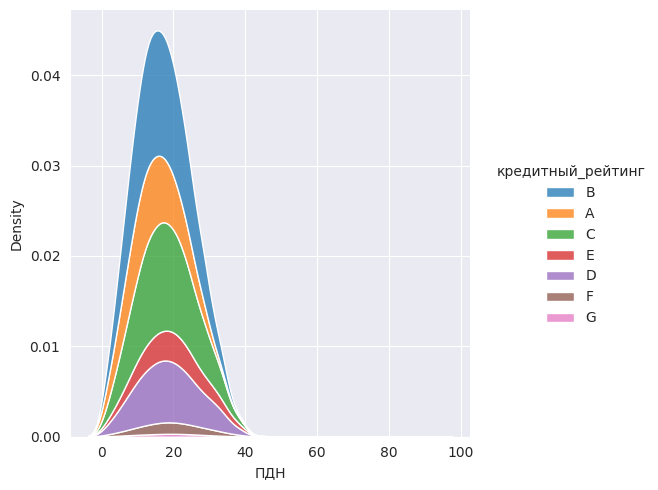

In [ ]:
import seaborn
sns.displot(df_copy, x="ПДН", kind="kde", bw_adjust=2, multiple="stack", hue="кредитный_рейтинг", fill=True) #binwidth=20, discrete=True, ... bw_adjust=2,  multiple="stack",

На оси Y отображена **плотность вероятности распределения** "показателя долговой нагрузки". Чем выше кривая, тем больше вероятность того, что значение показателя будет находиться в этом диапазоне. На графике представлено несколько кривых, каждая из которых соответствует определенному уровню кредитного рейтинга. Эти кривые показывают, как распределены значения: **показатель долговой нагрузки для разных уровней кредитного рейтинга** представлено **симметричное распределение вокруг среднего значения 18**.

Выводы:

— у заемщиков с разными уровнями кредитного рейтинга схожие показатели долговой нагрузки, и нет значительных различий между ними

— может оказаться эффективным прогнозировать уровень кредитного рейтинга заемщика на основе показателя нагрузки по долгам